In [5]:
from Tester import Tester 
import robot_color_tracking as track
import numpy as np

# ["daylight", "night right bulb", "night center bulb", "night left bulb"]
# [1,1,1] * [1,1,1]
# [1,1,1] * [1,0,1]
# [1,1,1] * [1,0,1]

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])

detected = []
false_negative = []
false_positive = []
d_parameter = list(range(10, 70, 5))
for d in d_parameter:
    trackers = {
        'achromatic': track.AchromaticTrack(d=d,img_width=500, binaryThreshold= 40,hueTolerance=15,
                                            satTolerance=0, kernel = kernel, convolution=True,
                                            colors=['red','springGreen','skyBlue','yellow'])
    }

    tester = Tester(trackers=trackers,id_options=['red','springGreen','skyBlue','yellow'])
    tester.load_positions()
    tester.evaluate_error()





#     tester.save_error_and_time()

# tester = Tester(methods=['colors_naive', 'achromatic', 'hough_colors'],id_options=['red','springGreen','skyBlue','yellow'])
# tester.get_statistics_by_id()
#     tester.load_error(folder='')
# tester.load_positions()
# print(tester.positions_data)
# tester.evaluate_error()
# print(tester.error)
# tester.save_error_and_time()
# tester.get_statistics_by_id() # pos_data = tester.filter_place_methods(tester.positions_data, 'night center bulb'),
#                                err = tester.filter_place_methods(tester.error, 'night center bulb')
    statistics = tester.get_statistics_by_place()

    detected.append(0)
    false_negative.append(0)
    false_positive.append(0)
    for p in statistics['achromatic']:
        if(p != 'time'):
            detected[-1] += statistics['achromatic'][p]['detected']
            false_negative[-1] += statistics['achromatic'][p]['false_negative']
            false_positive[-1] += statistics['achromatic'][p]['false_positive']

    detected[-1] /= 4
    false_negative[-1] /= 4
    false_positive[-1] /= 4


    # filtered_id = tester.filter_id(tester.error['colors_naive'], 'red')
    # tester.get_only_error_id(filtered_id, 'red')
    # Resolver place_options

Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 303
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 260
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 202
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 174
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 155
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 132
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 111
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 108
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 99
Statistics calculated
Tester was initialized
Real positions loaded
achromatic: 100.00%    i: 78
Statistics calculated
Tester was initialized
Real posi

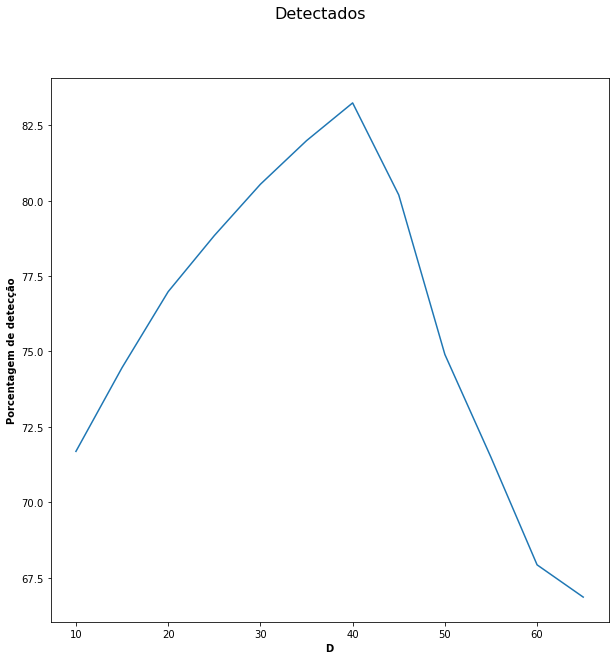

In [8]:
import matplotlib.pyplot as plt

# Tempo médio de execução
plt.figure(figsize=(10,10))

plt.plot(d_parameter, detected)

plt.xlabel('D', fontweight ='bold') 
plt.ylabel('Porcentagem de detecção', fontweight ='bold') 
plt.suptitle('Detectados', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/28-3-2021/d_paramater_detected_conv_circ_3x3.png')
plt.show()

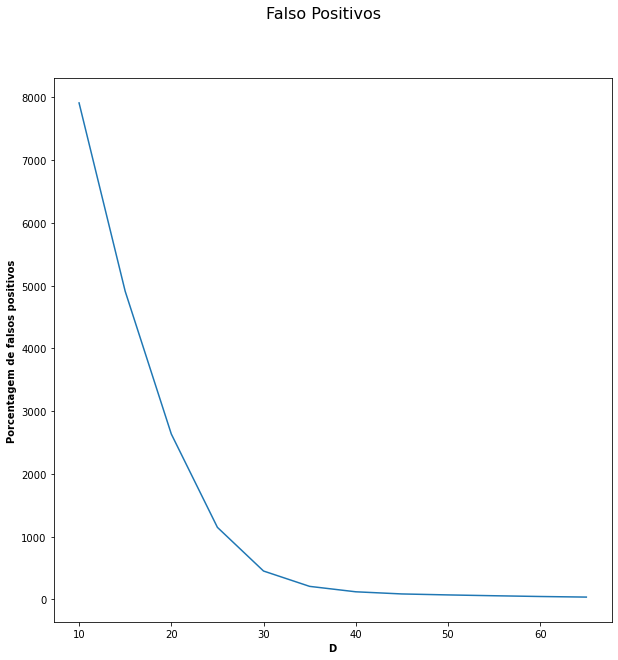

In [6]:
import matplotlib.pyplot as plt

# Tempo médio de execução
plt.figure(figsize=(10,10))

plt.plot(d_parameter, false_positive)

plt.xlabel('D', fontweight ='bold') 
plt.ylabel('Porcentagem de falsos positivos', fontweight ='bold') 
plt.suptitle('Falso Positivos', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/28-3-2021/d_paramater_false_positive_conv_circ_3x3.png')
plt.show()

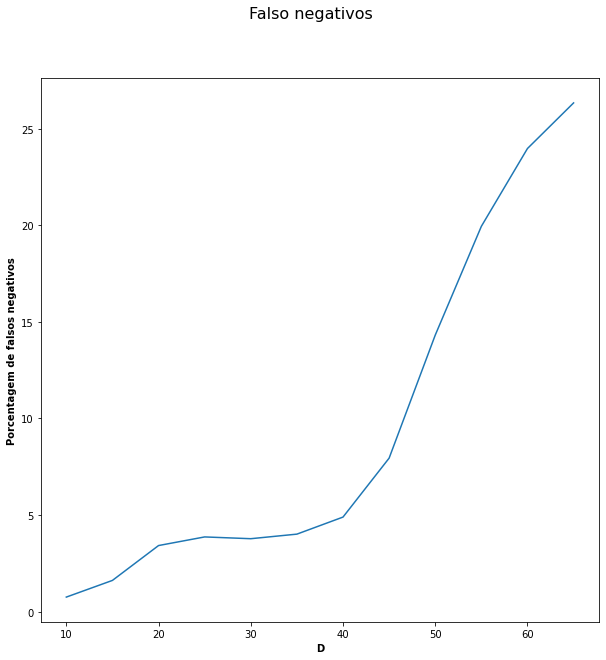

In [7]:
import matplotlib.pyplot as plt

# Tempo médio de execução
plt.figure(figsize=(10,10))

plt.plot(d_parameter, false_negative)

plt.xlabel('D', fontweight ='bold') 
plt.ylabel('Porcentagem de falsos negativos', fontweight ='bold') 
plt.suptitle('Falso negativos', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/28-3-2021/d_paramater_false_negative_conv_circ_3x3.png')
plt.show()